In [1]:
import jax.numpy as jnp
import pickle
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

from jax.flatten_util import ravel_pytree

In [82]:
# Load the desired pickle file
activation_dict = pickle.load(open('/mnt/SharedDrive/Repositories/Maxwell_demon/logs/metadata/asymptotic_live_neurons/2022-07-04---July 04---14:54:50/activations_meta.p',
                             'rb'))
print(activation_dict.keys())

dict_keys(['maximum', 'mean', 'count'])


In [4]:
def count_total_neurons(activations):
    """return the total neurons in given model"""
    total_neurons = []
    for layer_activ in activations:
        flat_layer_activations, unravel_fn = ravel_pytree(layer_activ)
        total_neurons.append(len(flat_layer_activations))
    return total_neurons

def count_epsilon_close(eps, activations):
    """Return the number of epsion_close live neurons in the given model"""
    count=[]
    for layer_activ in activations:
        flat_layer_activations, unravel_fn = ravel_pytree(layer_activ)
        count.append(jnp.sum(flat_layer_activations >eps))
    return count  

<IPython.core.display.Javascript object>


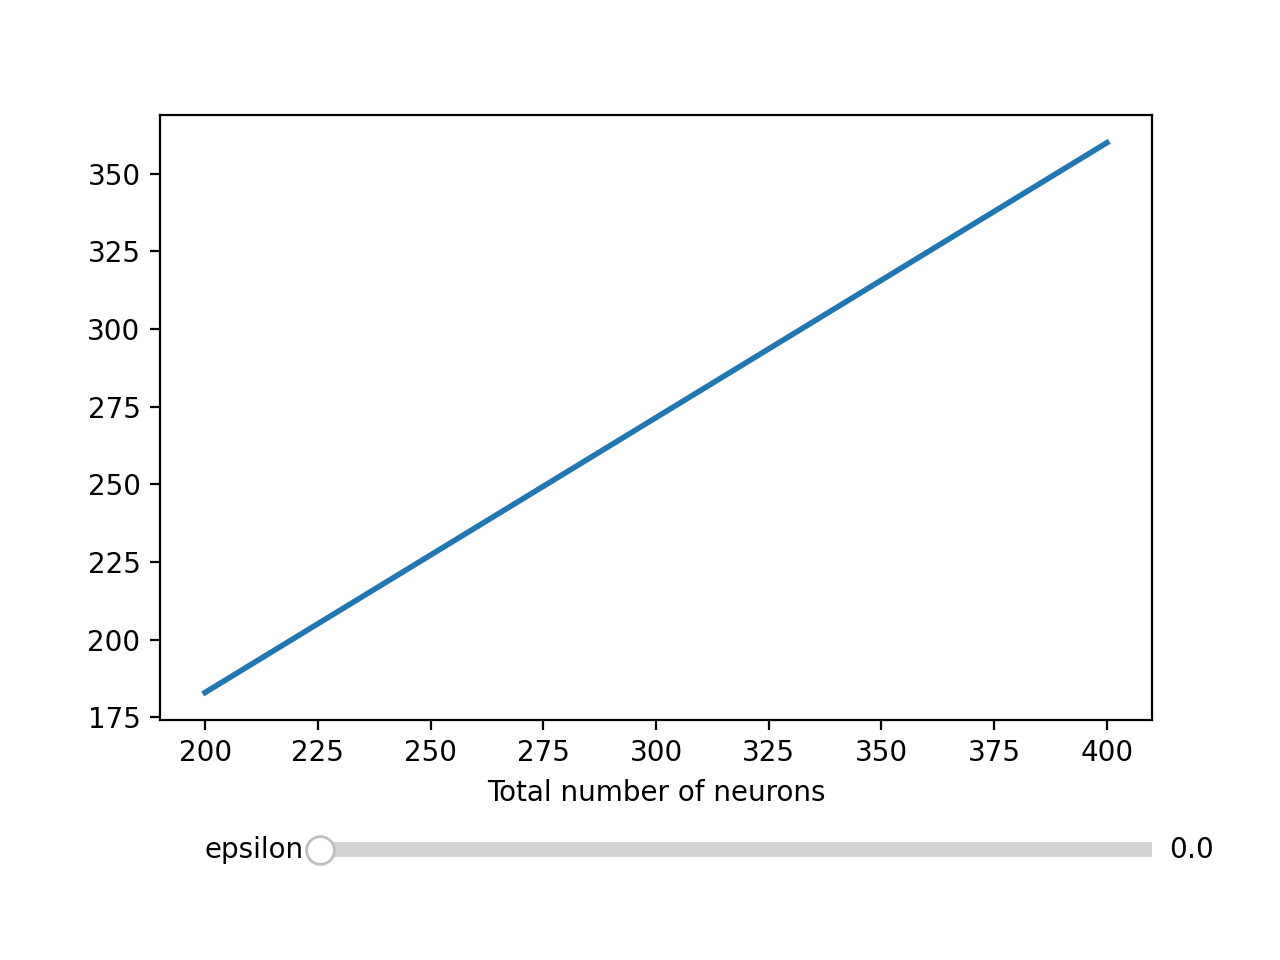

In [10]:
%matplotlib notebook

# Inspecting maximum activation value:
key = 'maximum'
activations = activation_dict[key]

# Initial eps value
init_eps = 0

# total_neurons
total_neurons = count_total_neurons(activations)

# Create the figure
fig, ax = plt.subplots()
line, = plt.plot(total_neurons, count_epsilon_close(init_eps, activations), lw=2)
ax.set_xlabel('Total number of neurons')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(bottom=0.25) 

# Make a horizontal slider to control epsilon
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
eps_slider = Slider(
    ax=axfreq,
    label='epsilon',
    valmin=0.0,
    valmax=0.5,
    valinit=init_eps,
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(count_epsilon_close(eps_slider.val, activations))
    fig.canvas.draw_idle()
    
# register the update function with each slider
eps_slider.on_changed(update)

plt.show()

<IPython.core.display.Javascript object>


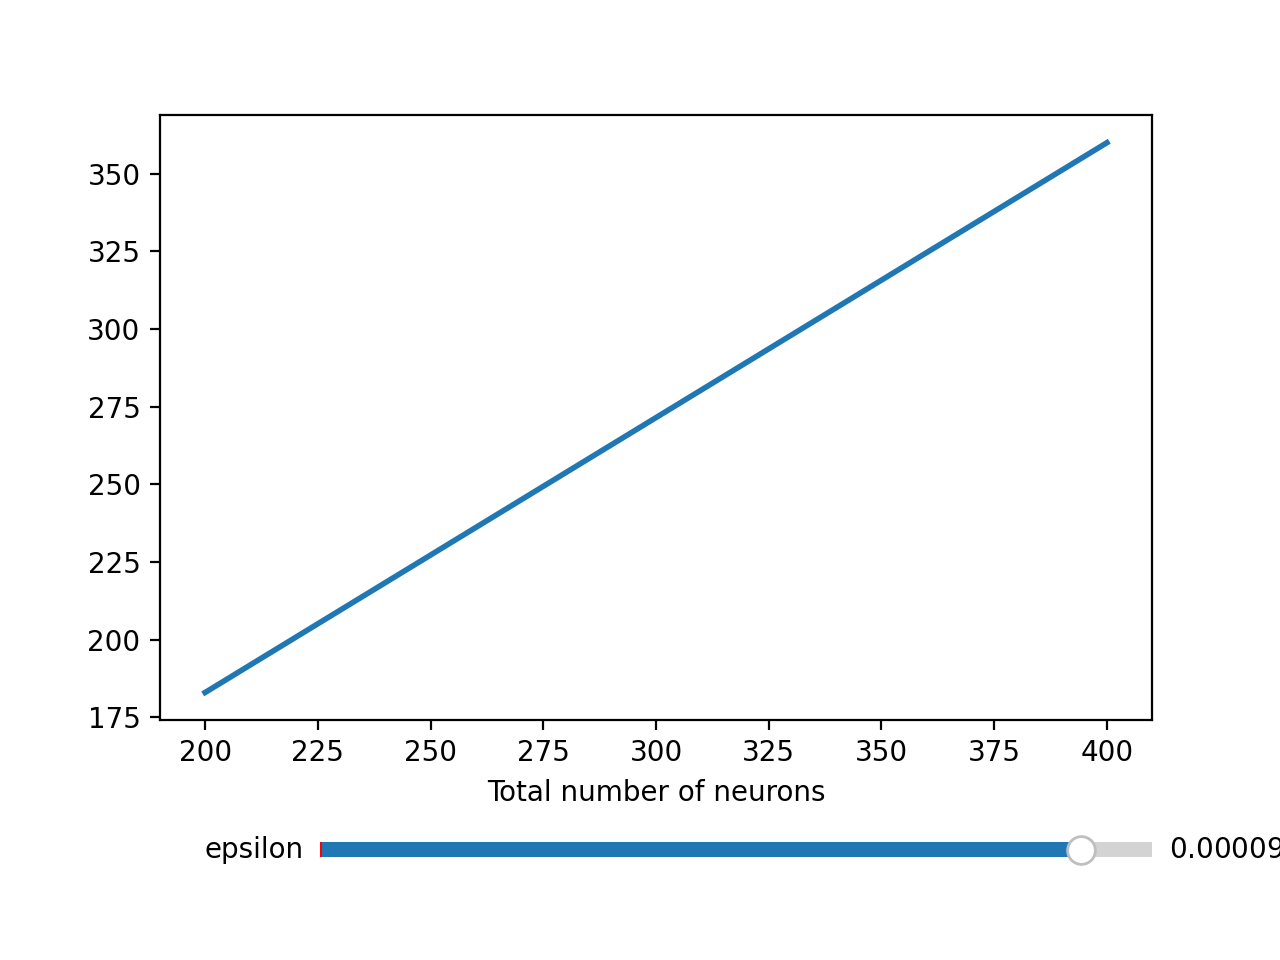

In [7]:
%matplotlib notebook

# Inspecting mean activation value:
key = 'mean'
activations = activation_dict[key]

# Initial eps value
init_eps = 0

# total_neurons
total_neurons = count_total_neurons(activations)

# Create the figure
fig, ax = plt.subplots()
line, = plt.plot(total_neurons, count_epsilon_close(init_eps, activations), lw=2)
ax.set_xlabel('Total number of neurons')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(bottom=0.25) 

# Make a horizontal slider to control epsilon
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
eps_slider = Slider(
    ax=axfreq,
    label='epsilon',
    valmin=0.0,
    valmax=0.0001,
    valinit=init_eps,
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(count_epsilon_close(eps_slider.val, activations))
    fig.canvas.draw_idle()
    
# register the update function with each slider
eps_slider.on_changed(update)

plt.show()

<IPython.core.display.Javascript object>


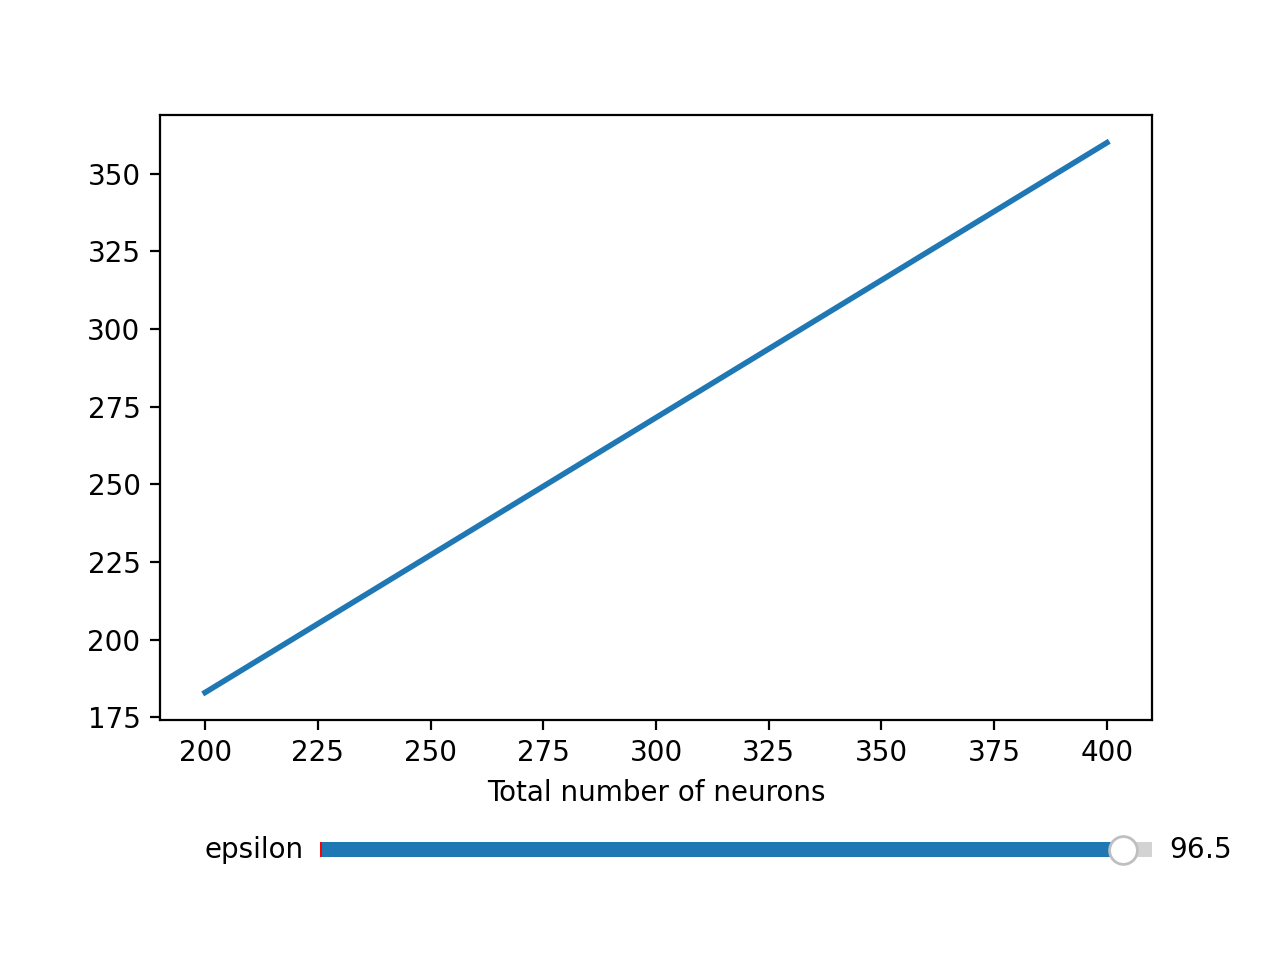

In [5]:
%matplotlib notebook

# Inspecting count value:
key = 'count'
activations = activation_dict[key]

# Initial eps value
init_eps = 0

# total_neurons
total_neurons = count_total_neurons(activations)

# Create the figure
fig, ax = plt.subplots()
line, = plt.plot(total_neurons, count_epsilon_close(init_eps, activations), lw=2)
ax.set_xlabel('Total number of neurons')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(bottom=0.25) 

# Make a horizontal slider to control epsilon
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
eps_slider = Slider(
    ax=axfreq,
    label='epsilon',
    valmin=0,
    valmax=100,
    valinit=init_eps,
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(count_epsilon_close(eps_slider.val, activations))
    fig.canvas.draw_idle()
    
# register the update function with each slider
eps_slider.on_changed(update)

plt.show()

In [ ]:
### Manipulating params  (pruning)

In [85]:
import jax
import utils.utils as utl
from importlib import reload
reload(utl)  # For debugging

params_dict = pickle.load(open('/mnt/SharedDrive/Repositories/Maxwell_demon/logs/metadata/asymptotic_live_neurons/2022-07-04---July 04---14:54:50/params_meta.p',
                             'rb'))
print(params_dict.keys())
print(len(params_dict['parameters']))

dict_keys(['parameters'])
2


In [86]:
def get_neural_state(activations, eps):
    flat_activations, unravel_fn = ravel_pytree(activations)
    flat_activations = (flat_activations <= eps)
    return unravel_fn(flat_activations)

In [87]:
model_number = 1  # model_number + 1 trained model from asymptotic experiment
params_sizes_2 = params_dict['parameters'][model_number]

key = 'count'
activations = activation_dict[key][model_number]

neurons_state = get_neural_state(activations, 0)
filtered_params, new_sizes = utl.remove_dead_neurons_weights(params_sizes_2, neurons_state)
print(jax.tree_map(jax.numpy.shape, filtered_params))
print("========================")
print(new_sizes)

{'model_and_activations/conv2_d': {'b': (64,), 'w': (3, 3, 1, 64)}, 'model_and_activations/conv2_d_1': {'b': (128,), 'w': (3, 3, 64, 128)}, 'model_and_activations/conv2_d_2': {'b': (256,), 'w': (3, 3, 128, 256)}, 'model_and_activations/linear': {'b': (128,), 'w': (1024, 128)}, 'model_and_activations/linear_1': {'b': (10,), 'w': (128, 10)}}
0 model_and_activations/conv2_d
(64,)
(64,)
(3, 3, 1, 64)
1 model_and_activations/conv2_d_1
(128,)
(128,)
(3, 3, 64, 128)
2 model_and_activations/conv2_d_2
(256,)
(256,)
(3, 3, 128, 256)
3 model_and_activations/linear
(128,)
(128,)
(992, 128)
{'model_and_activations/conv2_d': {'b': (64,), 'w': (3, 3, 1, 64)}, 'model_and_activations/conv2_d_1': {'b': (128,), 'w': (3, 3, 64, 128)}, 'model_and_activations/conv2_d_2': {'b': (248,), 'w': (3, 3, 128, 248)}, 'model_and_activations/linear': {'b': (41,), 'w': (992, 41)}, 'model_and_activations/linear_1': {'b': (10,), 'w': (41, 10)}}
(64, 128, 248, 41)


In [89]:
# Try to create and evaluate the pruned model
from utils.config import architecture_choice, dataset_choice

eval_size = 512
load_data = dataset_choice['mnist']
test_size, test_eval = load_data(split="test", is_training=False, batch_size=eval_size, cardinality=True)
train_size, train_eval = load_data(split="train", is_training=False, batch_size=eval_size, cardinality=True)

architecture = architecture_choice['conv_3_2'](new_sizes, 10)
net = utl.build_models(architecture)
accuracy_fn = utl.accuracy_given_model(net)
final_accuracy_fn = utl.create_full_accuracy_fn(accuracy_fn, test_size // eval_size)
full_train_acc_fn = utl.create_full_accuracy_fn(accuracy_fn, train_size // eval_size)

test_full_accuracy = jax.device_get(final_accuracy_fn(filtered_params, test_eval))

print("test accuracy: ",test_full_accuracy)

train_full_accuracy = jax.device_get(full_train_acc_fn(filtered_params, test_eval))

print("train accuracy: ",train_full_accuracy)




test accuracy:  0.9893092
train accuracy:  0.9893163
